<a href="https://colab.research.google.com/github/WambuiKahuthu/MORINGA_CORE_WEEK4_IP_HYPOTHESIS_TESTING/blob/main/Moringa_Data_science_Core_W4_Independen_Project_2021_08_Wambui_Kahuthu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing

**Background of the study**  
After a quick look at the dataset that contains data on the usage of Autolib's cars between 1st January 2018 and 19th June 2018, Autolib's manager claims that the average number of Bluecars taken from station with postal code 75015 is the same as the average number of Bluecars taken from station with postal code 75016 on the weekdays. This study seeks to establish whether this claim is true or not.

**Hypothesis**  
Null hypothesis: There is no difference between the average number of Bluecars taken from station with postal code 75015 and the average number of Bluecars taken from station with postal code 75016 on the weekdays   
Alternative hypothesis: There is a difference between the average number of Bluecars taken from station with postal code 75015 and the average number of Bluecars taken from station with postal code 75016 on the weekdays

*Keys*  
$H_{0}$ = Null hypothesis  
$H_{1}$ = Alternative hypothesis  
$mu_{1}$ = Average number of Bluecars taken from postal code 75015 on the weekdays  
$mu_{2}$ = Average number of Bluecars taken from postal code 75016 on the weekends  

$H_{0}$: $mu_{1}$ = $mu_{2}$  
$H_{1}$: $mu_{1}$ ≠ $mu_{2}$  

**Process**  
We will load the required dataset for the study, clean it, obtain sample units from the two postal codes, perform univariate analysis, then conduct a hypothesis test so as to determine whether we should reject or fail to reject the null hypothesis. 


## Importing Our Libraries

In [ ]:
# importing pandas
import pandas as pd

# importing numpy
import numpy as np

# importing matplotlib.pyplot
import matplotlib.pyplot as plt

# importing scipy.stats
import scipy.stats as stats

# importing seaborn
import seaborn as sns

## Loading Our Dataset

In [ ]:
# Load csv dataset with the required data from given url 'http://bit.ly/DSCoreAutolibDataset'
autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

## Reading the Dataset

In [ ]:
# Preview the top 5 entries in our dataset
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Preview the bottom 5 entries in our dataset
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Check the general information about our dataset
# The information includes the number of entries and columns, name of each column, number of non-null values in every column, the data type of each column, and the distribution of each data type
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
# Change "Postal code" and "date" columns' data types
autolib['date'] = pd.to_datetime(autolib['date'])

autolib['Postal code'] = autolib['Postal code'].astype(str)

# Verify data type change
autolib.dtypes

Postal code                       object
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

## Cleaning the Data

### i. Validity

In [ ]:
# Select the relevant columns for the analysis
# Create dataframe with "Postal code", "BlueCars_taken_sum", and "date" columns (date column is retained to identify duplicates in data)
# Select postal codes "75015" and "75016" in "Postal code" column and specify "weekday" as the day type
postal_data = autolib[['Postal code', 'date','BlueCars_taken_sum']][((autolib['Postal code']=='75015')|(autolib['Postal code']=='75016'))&(autolib['day_type']=='weekday')].reset_index()

# Drop 'index' column
cols = [0] #specify the index of the column to be dropped
postal_data.drop(postal_data.columns[cols],axis=1,inplace=True) #drop the column by the index

# Rename BlueCars_taken_sum to bluecars_taken
postal_data.rename(columns = {'BlueCars_taken_sum':'bluecars_taken'}, inplace = True)

# Display the some records of the dataframe
postal_data

,Postal code,date,bluecars_taken
0,75015,2018-01-01,781
1,75015,2018-01-02,710
2,75015,2018-01-03,739
3,75015,2018-01-04,669
4,75015,2018-01-05,852
...,...,...,...
219,75016,2018-06-13,850
220,75016,2018-06-14,844
221,75016,2018-06-15,909
222,75016,2018-06-18,781


### ii. Uniformity

In [ ]:
#Standardize the column names by removing white spaces using strip()function, lowering the cases using lower() function, and replacing middle spaces with underscore 
postal_data.columns = postal_data.columns.str.strip().str.lower().str.replace(' ', '_')

#display the standardized column names  
postal_data.columns

Index(['postal_code', 'date', 'bluecars_taken'], dtype='object')

### iii. Completeness

In [ ]:
# Check for duplicates in the dataset
postal_data.duplicated().sum()

0

There are no duplicates to be dropped


### iv. Consistency

In [ ]:
# Check for null values
postal_data.isnull().sum().sum()

0

There are no null values to be dropped or replaced

### v. Anomalies

In [ ]:
# Upon the investigation of the main dataset it was discovered that records on dates '2018-06-19' and '2018-02-24' were significantly lower than the usual data entries due to unidentified reasons. 
# As much as they show the accurate data on the car usage, on the specific days, they do not represent the usual car usage in the different postal codes.
# If included in a random sample, they are likely to change the results or assumptions of the analysis; therefore, they will be dropped.

# Drop rows with '2018-06-19' or '2018-02-24' in the 'date' column
postal_data = postal_data.drop(postal_data[(postal_data.date=='2018-06-19')|(postal_data.date=='2018-02-24')].index)

### v. Outliers

Instead of finding outliers within the general dataframe, we will divide the dataframe per postal code and find outliers within the different subsets

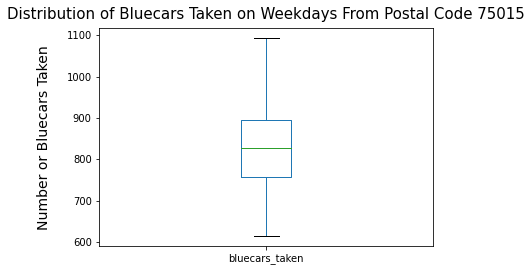

In [ ]:
# Create a dataset with 75015's postal code data
post1 =  postal_data[['postal_code', 'bluecars_taken']][(postal_data['postal_code']=='75015')]

# Plot a boxplot to identify outliers
post1.boxplot(column=['bluecars_taken'], grid=False)

# Giving the box plot a title
plt.title('Distribution of Bluecars Taken on Weekdays From Postal Code 75015', fontsize=15, y=1.015)
# labelling the y axis
plt.ylabel('Number or Bluecars Taken', fontsize=14, labelpad=15)
# displaying the histogram
plt.show()

From the boxplot, there are no outliers in postal code 75015 data.

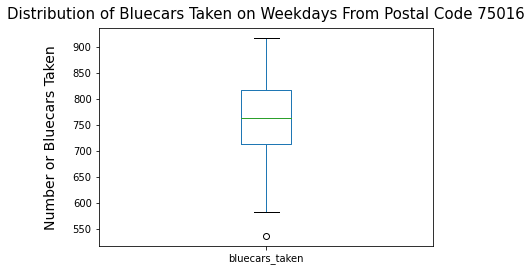

In [ ]:
# Create a dataframe with 75016's postal code data
post2 =  postal_data[['postal_code', 'bluecars_taken']][(postal_data['postal_code']=='75016')]

# Plot a boxplot to identify outliers
post2.boxplot(column=['bluecars_taken'], grid=False)

# Giving the box plot a title
plt.title('Distribution of Bluecars Taken on Weekdays From Postal Code 75016', fontsize=15, y=1.015)
# labelling the y axis
plt.ylabel('Number or Bluecars Taken', fontsize=14, labelpad=15)
# displaying the histogram
plt.show()

There is no justifiable reason to remove the outliers as they accurately reflect the usage of cars in the different postal codes; therefore, we will keep the outliers.

In [ ]:
# View number of records of the cleaned dataset
postal_data.shape

(222, 3)

## Exporting the Cleaned Dataset 

In [ ]:
# Exporting the cleaned dataset as a csv file
postal_data.to_csv('postal_data_75015_76016.csv')

## Sampling

In [ ]:
# Create a stratified random sample by grouping the dataset by postal code, then extracting sample units from each group
# The sample size is calculated using the Yamane formula with 0.05 as the margin of error, and 95% as the confidence level 
postal_sample = postal_data.groupby('postal_code', group_keys=False).apply(lambda x : x.sample(replace='False', frac=((222/(1+222*(0.05**2)))/222)))

# Print the number of sample units from each postal code
print(postal_sample['postal_code'].value_counts())

# Display some of the sample's data 
postal_sample

75016    71
75015    71
Name: postal_code, dtype: int64


,postal_code,date,bluecars_taken
69,75015,2018-04-10,887
19,75015,2018-01-26,963
14,75015,2018-01-19,950
27,75015,2018-02-07,625
13,75015,2018-01-18,831
...,...,...,...
125,75016,2018-01-18,728
142,75016,2018-02-12,665
112,75016,2018-01-01,693
120,75016,2018-01-11,715


In [ ]:
# Exporting the sample dataset as a csv file
postal_sample.to_csv('postal_sample_75015_75016.csv')

## Univariate Analysis

For us to conduct univariate analysis that is meaningful to our objective, we are required to split the sample data by the postal code in order to analyse each group independently. The univariate analysis will make us understand our sample data better.

In [ ]:
# Creating a subset with 75015's postal code sample data
post1_sample =  postal_sample[['postal_code', 'bluecars_taken']][(postal_sample['postal_code']=='75015')]

# Creating a subset with 75016's postal code sample data
post2_sample =  postal_sample[['postal_code', 'bluecars_taken']][(postal_sample['postal_code']=='75016')]

### i. Measures of central tendancy

#### a. Postal code 75015 

Mean

In [ ]:
post1_sample['bluecars_taken'].mean()

837.6478873239437

Median

In [ ]:
post1_sample['bluecars_taken'].median()

839.0

Mode

In [ ]:
post1_sample['bluecars_taken'].mode()

0    819
dtype: int64

#### b. Postal code 75016

Mean

In [ ]:
post2_sample['bluecars_taken'].mean()

766.0845070422536

Median

In [ ]:
post2_sample['bluecars_taken'].median()

768.0

Mode

In [ ]:
post2_sample['bluecars_taken'].mode()

0    731
1    741
dtype: int64

### ii. Measures of dispersion

#### a. Postal code 75015

Variance

In [ ]:
post1_sample['bluecars_taken'].var()

10149.65995975855

Standard deviation

In [ ]:
post1_sample['bluecars_taken'].std()

100.74552079253226

Range

In [ ]:
max_taken = post1_sample['bluecars_taken'].max()
min_taken = post1_sample['bluecars_taken'].min()

max_taken - min_taken

479

Quartiles

In [ ]:
# Calculating the quantiles 
post1_sample['bluecars_taken'].quantile([0.25,0.5,0.75])

0.25    777.0
0.50    839.0
0.75    895.0
Name: bluecars_taken, dtype: float64

Interquartile range

In [ ]:
# Calculating the interquatile range
Q3 = post1_sample['bluecars_taken'].quantile(0.75)
Q1 = post1_sample['bluecars_taken'].quantile(0.25)

Q3-Q1

118.0

Skewness

In [ ]:
post1_sample['bluecars_taken'].skew()

0.028824688874674664

Kurtosis

In [ ]:
post1_sample['bluecars_taken'].kurt()

0.04224511613248261

#### b. Postal code 75016

Variance

In [ ]:
post2_sample['bluecars_taken'].var()

5583.164185110663

Standard deviation

In [ ]:
post2_sample['bluecars_taken'].std()

74.72057404162967

Range

In [ ]:
max_taken = post2_sample['bluecars_taken'].max()
min_taken = post2_sample['bluecars_taken'].min()

max_taken - min_taken

334

Quartiles

In [ ]:
# Calculating the quantiles 
post2_sample['bluecars_taken'].quantile([0.25,0.5,0.75])

0.25    724.5
0.50    768.0
0.75    806.0
Name: bluecars_taken, dtype: float64

Interquartile range

In [ ]:
# Calculating the interquatile range
Q3 = post2_sample['bluecars_taken'].quantile(0.75)
Q1 = post2_sample['bluecars_taken'].quantile(0.25)

Q3-Q1

81.5

Skewness

In [ ]:
post2_sample['bluecars_taken'].skew()

-0.30910205589341294

Kurtosis

In [ ]:
post2_sample['bluecars_taken'].kurt()

0.0791228558394459

### iii. Visualizations

#### a. Postal code 75015

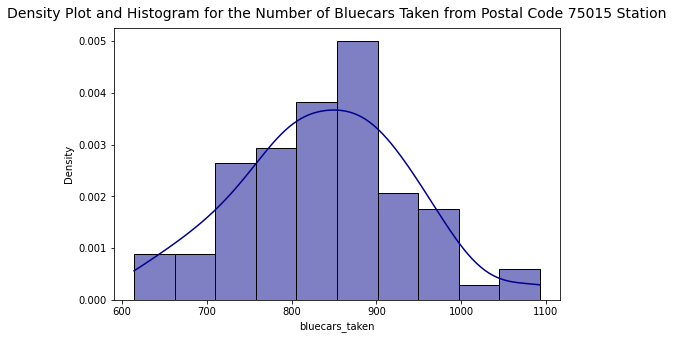

In [ ]:
# Specifying the size of the graph
fig, ax = plt.subplots(figsize=(8,5))

# Ploting density plot and histogram of the number of cars taken from station with postal code 75015
sns.histplot(post1_sample['bluecars_taken'], kde=True, stat="density",color='darkblue', bins=10)

# Label the graph
plt.title('Density Plot and Histogram for the Number of Bluecars Taken from Postal Code 75015 Station', fontsize=14, y=1.015)

plt.show()


#### b. Postal code 75016

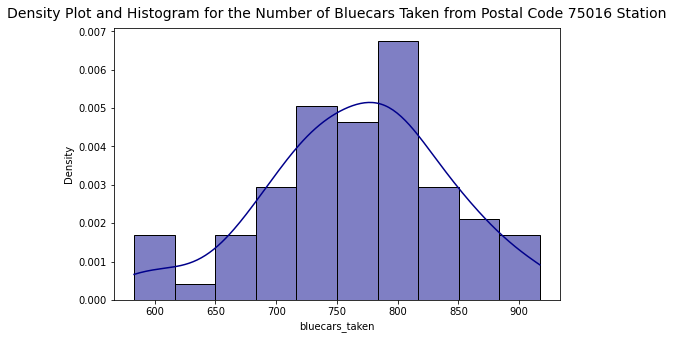

In [ ]:
# Specifying the size of the graph
fig, ax = plt.subplots(figsize=(8,5))

# Ploting density plot and histogram of the number of cars taken from station with postal code 75016
sns.histplot(post2_sample['bluecars_taken'], kde=True, stat="density",color='darkblue', bins=10)

# Label the graph
plt.title('Density Plot and Histogram for the Number of Bluecars Taken from Postal Code 75016 Station', fontsize=14, y=1.015)

plt.show()

## Hypothesis Testing

Since we do not know the population's standard deviation, the most appropriate hypothesis test for this study will be a t-test but before the t-test is conducted, the assumptions of the test need to be checked to see if the t-test results can be trusted.    

The following are assumptions of a t-test
1. The samples are independently and randomly drawn
2. The distribution of the residuals between the two groups follow the normal distribution
3. The variances between the two groups are equal, incase of unequal variances we would conduct a Welch’s t-test instead of a Student t-test  

If any of these assumptions are violated then another test should be used.  


### Checking the equality of the variances

In [ ]:
## Check the equality of the variances between the two groups using Levene's test

stat,p = stats.levene(post1_sample['bluecars_taken'], post2_sample['bluecars_taken'], center='mean') # we use center = mean because our samples are fairly/moderately skewed

print('Statistic=%.4f, pvalue=%.4f' % (stat, p))

# Interpretation of the Levene's test results

alpha = 0.05
if p <= alpha:
	print('The two variances are significantly different')
else:
	print('The two variances are approximately equal')

Statistic=5.5953, pvalue=0.0194
The two variances are significantly different


### Checking the distribution of the residuals between the two groups

In [ ]:
# Check the distribution of the residuals between the two groups using the Shapiro-Wilk test
from scipy.stats import shapiro

diff = post1_sample['bluecars_taken'] - post2_sample['bluecars_taken']

stat, p = shapiro(diff)

print('Statistic=%.4f, pvalue=%.4f' % (stat, p))

# Interpretation of the Shapiro-Wilk test results
alpha = 0.05
if p <= alpha:
	print('Sample does not look Gaussian')
else:
	print('Sample looks Gaussian')

Statistic=nan, pvalue=1.0000
Sample looks Gaussian


Since the samples are independently and randomly drawn and the distribution of the residuals between the two groups follow the normal distribution, but the variances between the two groups are significantly different, we will conduct the Welch's t-test.

### Conducting the t-test

In [ ]:
# Conduct the independent Welch's t-test using scipy.stats, use the stats.ttest_ind() method
stat,p = stats.ttest_ind(post1_sample['bluecars_taken'], post2_sample['bluecars_taken'], equal_var=False)

print('Statistic=%.14f, pvalue=%.14f' % (stat, p))

# Interpretation of the t-test results with 0.05 as the significance level
alpha = 0.025 #since the test is two tailed
if p <= alpha:
	print('We reject the null hypothesis')
else:
	print('We fail to reject the null hypothesis')

Statistic=4.80747103604465, pvalue=0.00000418073786
We reject the null hypothesis


**Conclusion**  
Based on the hypothesis test, we conclude that the difference between the average number of cars taken from station with postal code 75015 and the average number of cars taken from station with postal code 75016 is statistically significant; therefore we reject the null hypothesis for the alternative hypothesis.